### Se pide, usando regresión lineal:

Dibujar con una línea la relación que hay entre la altura y la edad de los alumnos de la clase: 

- ¿Es una buena técnica para este tipo de problemas? ¿Por qué? 
- ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python). Aparte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema?
- Representa la matriz de correlación, ¿los datos están correlacionados?
- ¿Qué ocurre si la altura se multiplica por dos? ¿Y si se multiplica solo la edad? 

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
import random

In [136]:
random.seed

<bound method Random.seed of <random.Random object at 0x000001E989370550>>

In [2]:
lista_edad_altura = [[29,  1.66], [22, 1.83], [31, 1.80], [27, 1.75], [22,1.82], [35,1.79], [34,1.90], [26,1.78], [26, 1.64], [23, 1.74],[24,1.85], [28, 1.75], [23, 1.83],[32,1.74], [34, 1.57], [27, 1.58],[38,1.70],[22, 1.79]]

## Data overlook and preparation

In [6]:
arr_alumn = np.reshape(lista_edad_altura,(-1,2))

In [10]:
df_alumn = pd.DataFrame(arr_alumn, columns=['Age', 'Height'])
df_alumn.head()

,Age,Height
0,29.0,1.66
1,22.0,1.83
2,31.0,1.80
3,27.0,1.75
4,22.0,1.82


In [57]:
X = arr_alumn[:,0].reshape(-1,1)
Y = arr_alumn[:, 1].reshape(-1,1)

### Original dots visualization

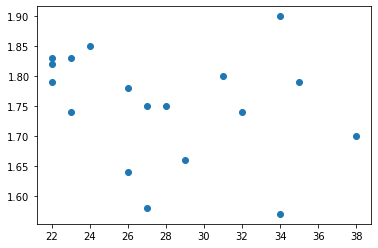

In [58]:
plt.scatter(X,Y)
plt.show()

## Model Training

In [137]:
# Model split
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2)


In [138]:
# Creating linear regression model
linreg = LinearRegression(n_jobs=-1)

In [139]:
# Fitting model with values (supervised training)
linreg.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

### Model predictions for trainig values

In [140]:
y_train_predict = linreg.predict(X_train)

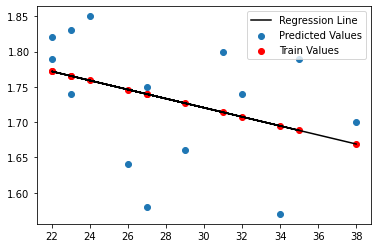

In [141]:
plt.scatter(X_train ,y_train)
plt.scatter(X_train , y_train_predict, color='r')
plt.plot(X_train, y_train_predict, color='black')
plt.legend(['Regression Line', 'Predicted Values', 'Train Values'])
plt.show()

### Model predictions for test values


In [142]:
y_test_predict = linreg.predict(X_val)

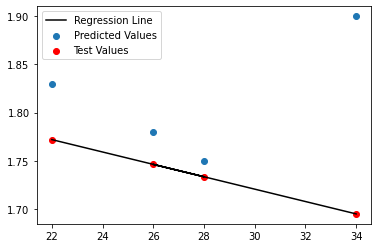

In [143]:
plt.scatter(X_val,y_val)
plt.scatter(X_val, y_test_predict, color='r')
plt.plot(X_val, y_test_predict, color='black')
plt.legend(['Regression Line', 'Predicted Values', 'Test Values'])
plt.show()

In [144]:
# y = a + bx

a = linreg.intercept_
b = linreg.coef_

print('secante =', a, '\t,', 'gradiente = ', b)

secante = [1.91340914] 	, gradiente =  [[-0.00643188]]


El módelo no es bueno puesto que no existe relación (coef aprox. 0) alguna entre la altura y la edad para estos datos. Por tanto, una regresión lineal no podrá predecir acertadamente una de las variables en función de la otra.

## Errores

- Error medio aboluto

In [145]:
# Train values
mean_absolute_error(y_train, y_train_predict)

0.06900209872638949

In [146]:
# Test values
mean_absolute_error(y_val, y_test_predict)

0.07846749849064244

- Error cuadrático medio

In [147]:
# Train values
mean_squared_error(y_train, y_train_predict)

0.0066001897478653385

In [148]:
# Test values
mean_squared_error(y_val, y_test_predict)

0.011733628028896957

- Raíz del error cuadrático medio

In [149]:
# Train values
mean_squared_error(y_train, y_train_predict, squared= False)

0.08124155185534887

In [150]:
# Test values
mean_squared_error(y_val, y_test_predict, squared=False)

0.10832187234763327

Los errores parecen bajos porque representan metros aunque proporcinalmente son altos dado el rango de alturas que hay. En este caso puede que el mejor indicador del error sea el MAE (mean absolute error), ya que estando los errores por debajo de la unidad, hacer el cuadrado de los mismos no penalizaía a los mayores errores, si no al revés, y puesto que tanto el MSE, como el RMSE se calculan teniendo en cuenta esto, serán menos acertados que el MAE.

## Matrix de Correlación

In [151]:
df_alumn.corr()

,Age,Height
Age,1.000000,-0.248752
Height,-0.248752,1.000000


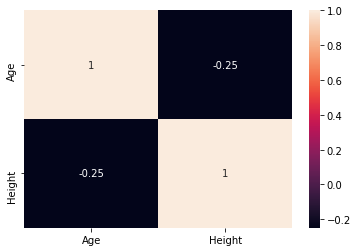

In [120]:
sns.heatmap(df_alumn.corr(), annot=True)
plt.show()

Los datos muestras unos indicadores de correlación muy pobres que indican que no exista correlación.

### Altura por 2

In [154]:
y_x_2 = Y*2

In [155]:
X_train, X_val, y_train, y_val = train_test_split(X, y_x_2, test_size=0.2)
linreg_Y2 = LinearRegression(n_jobs=-1)
linreg.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

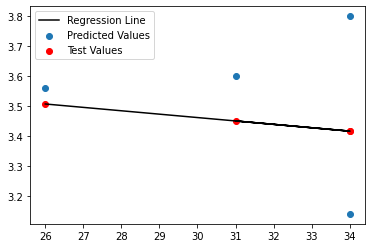

In [156]:
y_test_predict = linreg.predict(X_val)
plt.scatter(X_val,y_val)
plt.scatter(X_val, y_test_predict, color='r')
plt.plot(X_val, y_test_predict, color='black')
plt.legend(['Regression Line', 'Predicted Values', 'Test Values'])
plt.show()

MAE:

In [157]:
# Train values
print('MAE Training Data:', mean_absolute_error(y_train, y_train_predict))

# Test values
print('MAE Test Data:', mean_absolute_error(y_val, y_test_predict))

MAE Training Data: 1.7628571428571433
MAE Test Data: 0.21563683304647152


Coeficiente de regresión:

In [158]:
print('Coef. Regresión:', linreg.coef_)

Coef. Regresión: [[-0.0113253]]


### Edad por 2

In [159]:
X_x_2 = X*2

In [160]:
X_train, X_val, y_train, y_val = train_test_split(X_x_2, Y, test_size=0.2)
linreg_X2 = LinearRegression(n_jobs=-1)
linreg.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

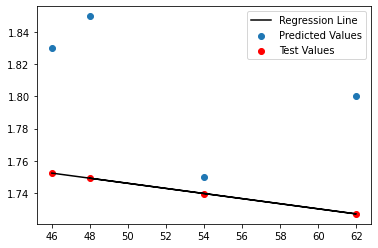

In [161]:
y_test_predict = linreg.predict(X_val)
plt.scatter(X_val,y_val)
plt.scatter(X_val, y_test_predict, color='r')
plt.plot(X_val, y_test_predict, color='black')
plt.legend(['Regression Line', 'Predicted Values', 'Test Values'])
plt.show()

MAE:

In [162]:
# Train values
print('MAE Training Data:', mean_absolute_error(y_train, y_train_predict))

# Test values
print('MAE Test Data:', mean_absolute_error(y_val, y_test_predict))

MAE Training Data: 0.07774214415087839
MAE Test Data: 0.06557342922028775


Coeficiente de regresión:

In [163]:
print('Coef. Regresión:', linreg.coef_)

Coef. Regresión: [[-0.0015897]]
